In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
real_estate = pd.read_csv(r"C:\Users\maria\OneDrive\Documents\Real_Estate_Sales_2001-2020_GL.csv")
real_estate.head().T

C:\Users\maria\AppData\Local\Temp\ipykernel_25700\2459702755.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate = pd.read_csv(r"C:\Users\maria\OneDrive\Documents\Real_Estate_Sales_2001-2020_GL.csv")


,0,1,2,3,4
Serial Number,2020348,20002,200212,200243,200377
List Year,2020,2020,2020,2020,2020
Date Recorded,09/13/2021,10/02/2020,03/09/2021,04/13/2021,07/02/2021
Town,Ansonia,Ashford,Avon,Avon,Avon
Address,230 WAKELEE AVE,390 TURNPIKE RD,5 CHESTNUT DRIVE,111 NORTHINGTON DRIVE,70 FAR HILLS DRIVE
Assessed Value,150500.0,253000.0,130400.0,619290.0,862330.0
Sale Amount,325000.0,430000.0,179900.0,890000.0,1447500.0
Sales Ratio,0.463,0.5883,0.7248,0.6958,0.5957
Property Type,Commercial,Residential,Residential,Residential,Residential
Residential Type,NaN,Single Family,Condo,Single Family,Single Family


In [3]:
print(f'This dataset has {real_estate.shape[0]} rows and {real_estate.shape[1]} columns')
for col in real_estate.columns:
     print(f'Column: {col:35} | type{str(real_estate[col].dtype):7} | missing values: {real_estate[col].isna().sum():3d}')

This dataset has 997213 rows and 14 columns
Column: Serial Number                       | typeint64   | missing values:   0
Column: List Year                           | typeint64   | missing values:   0
Column: Date Recorded                       | typeobject  | missing values:   2
Column: Town                                | typeobject  | missing values:   0
Column: Address                             | typeobject  | missing values:  51
Column: Assessed Value                      | typefloat64 | missing values:   0
Column: Sale Amount                         | typefloat64 | missing values:   0
Column: Sales Ratio                         | typefloat64 | missing values:   0
Column: Property Type                       | typeobject  | missing values: 382446
Column: Residential Type                    | typeobject  | missing values: 388309
Column: Non Use Code                        | typeobject  | missing values: 707532
Column: Assessor Remarks                    | typeobject  | missing

In [4]:
real_estate.duplicated().sum()

0

In [5]:
missing_values = (real_estate.isna().sum()/ len(real_estate)) * 100
missing_values

Serial Number        0.000000
List Year            0.000000
Date Recorded        0.000201
Town                 0.000000
Address              0.005114
Assessed Value       0.000000
Sale Amount          0.000000
Sales Ratio          0.000000
Property Type       38.351486
Residential Type    38.939424
Non Use Code        70.950940
Assessor Remarks    84.971716
OPM remarks         99.003824
Location            80.175048
dtype: float64

In [6]:
# For columns whose percentage of missing value is more than 50% 
to_be_dropped = missing_values >= 50
real_estate.drop(columns={'Non Use Code', 'Assessor Remarks', 'OPM remarks', 'Location'}, inplace= True)

In [7]:
# For columns who percentage is more than 30%
dropna_columns = missing_values >=30
real_estate.dropna(subset={"Property Type", 'Residential Type'}, inplace=True)
real_estate.isna().sum()

Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             4
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
dtype: int64

In [8]:
# Changing Date Recorded to the correct data type
real_estate['Date Recorded'] = pd.to_datetime(real_estate['Date Recorded'])
real_estate['Date Recorded']

1        2020-10-02
2        2021-03-09
3        2021-04-13
4        2021-07-02
5        2020-12-09
            ...    
997207   2020-08-03
997208   2020-06-24
997209   2019-11-27
997210   2020-04-27
997211   2020-06-03
Name: Date Recorded, Length: 608904, dtype: datetime64[ns]

In [9]:
# Average Listings Per Year 
Year_Count = real_estate.set_index('Date Recorded').resample('1y')['Serial Number'].size().reset_index()
Year_Count.columns = ['Year', 'Count']
Year_Count['Year'] = Year_Count['Year'].dt.year
Yearly_listings = Year_Count.groupby('Year')['Count'].mean().reset_index()
Yearly_listings.columns = ['Year', 'Average Listings']
Yearly_listings.set_index('Year', inplace = True)
Yearly_listings = Yearly_listings.reset_index()

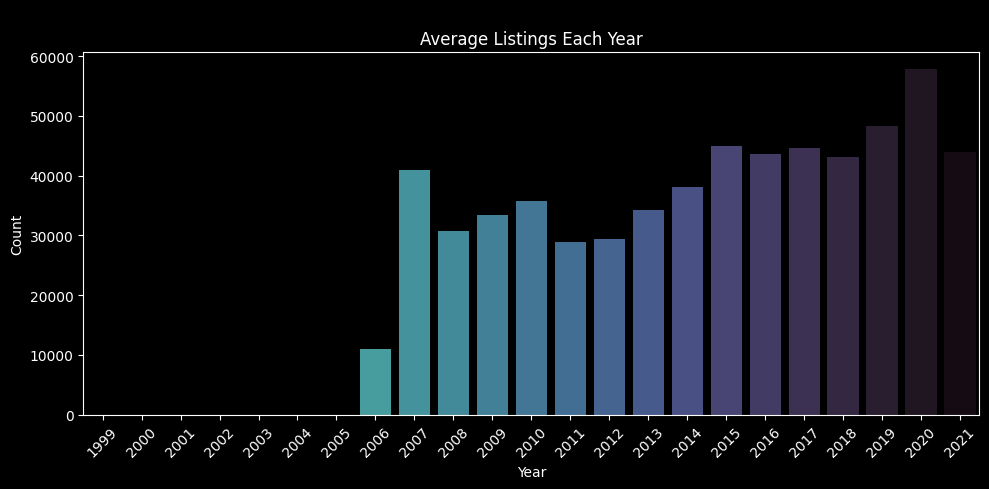

In [10]:
# Average Listings that happen per year
fig,ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(x = 'Year', y = 'Average Listings', data = Yearly_listings, palette='mako_r')
plt.title('\nAverage Listings Each Year')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

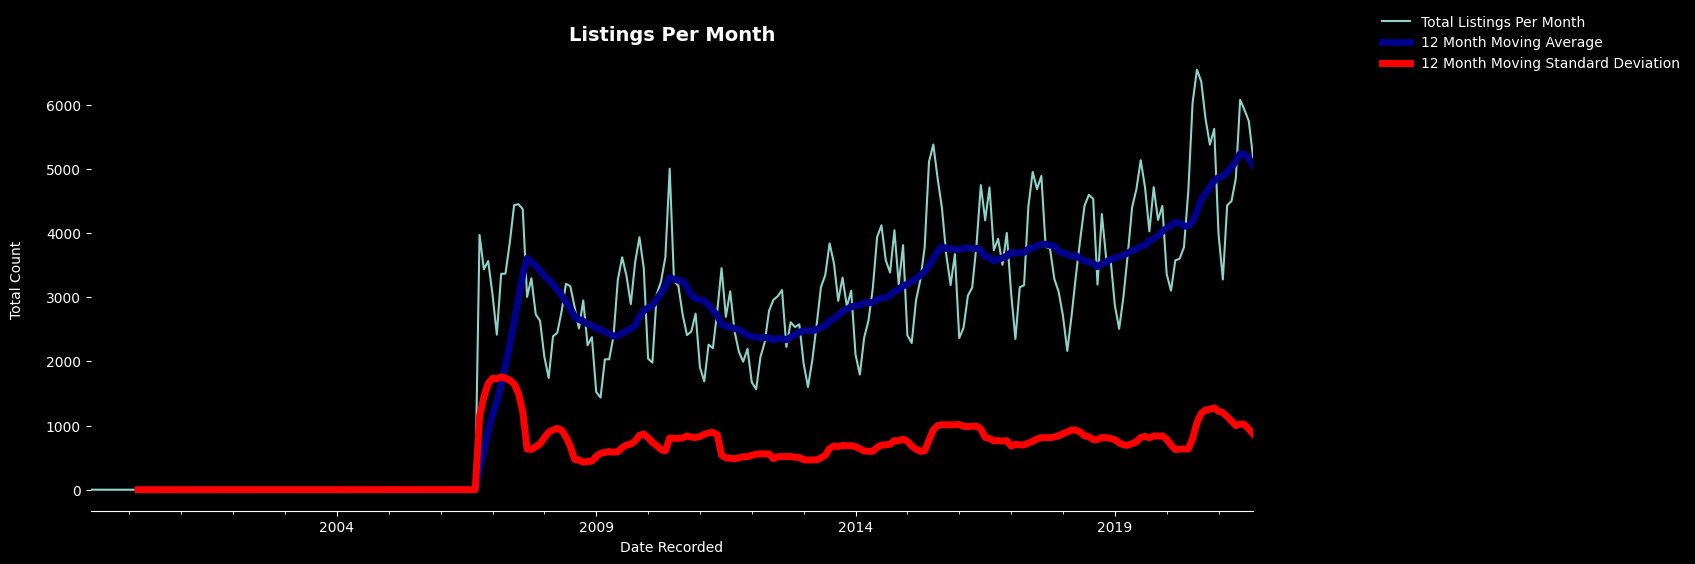

In [11]:
# Frequency of listings per year
fig, ax = plt.subplots(figsize = (15, 6))
real_estate.set_index('Date Recorded').resample('M').size().plot(label = 'Total Listings Per Month', ax = ax)
real_estate.set_index('Date Recorded').resample('M').size().rolling(window=12).mean().plot(color = 'darkblue', linewidth = 5, label = "12 Month Moving Average", ax = ax)
real_estate.set_index('Date Recorded').resample('M').size().rolling(window=12).std().plot(color = 'red', linewidth = 5, label = "12 Month Moving Standard Deviation", ax = ax)
ax.set_title("Listings Per Month", fontsize = 14, fontweight = 'bold')
ax.set(ylabel = "Total Count\n")
ax.legend(bbox_to_anchor =(1.1,1.1), frameon = False)
sns.despine(ax = ax, top = True, right = True, left = True, bottom = False)

In [12]:
# Year vs Revenue Made 
Yearly_Revenue = real_estate.groupby('List Year')['Sale Amount'].agg(['sum', 'mean']).sort_values(by = 'mean', ascending = False)
Yearly_Revenue.rename(columns={'sum':'Total Revenue', 'mean':'Average Revenue'}, inplace=True)

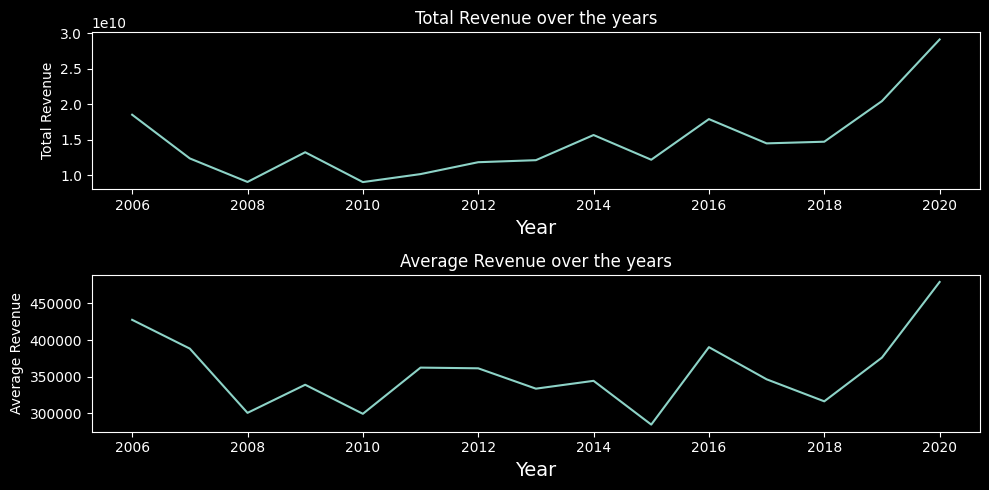

In [13]:
fig, ax = plt.subplots(nrows= 2, ncols=1, figsize =(10,5))
# Plotting  List Year vs Total Revenue made each Year
ax[0] = sns.lineplot(x = Yearly_Revenue.index, y='Total Revenue', data = Yearly_Revenue, ax = ax[0])
ax[0].set_title('Total Revenue over the years')
ax[0].set_ylabel('Total Revenue')
ax[0].set_xlabel('Year', fontsize = 14)

# List Year vs Average Revenue made each year
sns.lineplot(x = Yearly_Revenue.index, y='Average Revenue', data = Yearly_Revenue)
ax[1].set_title('Average Revenue over the years')
ax[1].set_ylabel('Average Revenue')
ax[1].set_xlabel('Year', fontsize = 14)
plt.tight_layout()
plt.show()

In [14]:
# Town that showed up in the lsiting
most_listed_towns = real_estate.groupby('Town')['Serial Number'].count().reset_index().sort_values('Serial Number', ascending = False)
most_listed_towns.rename(columns = {'Serial Number':'Count'}, inplace = True)

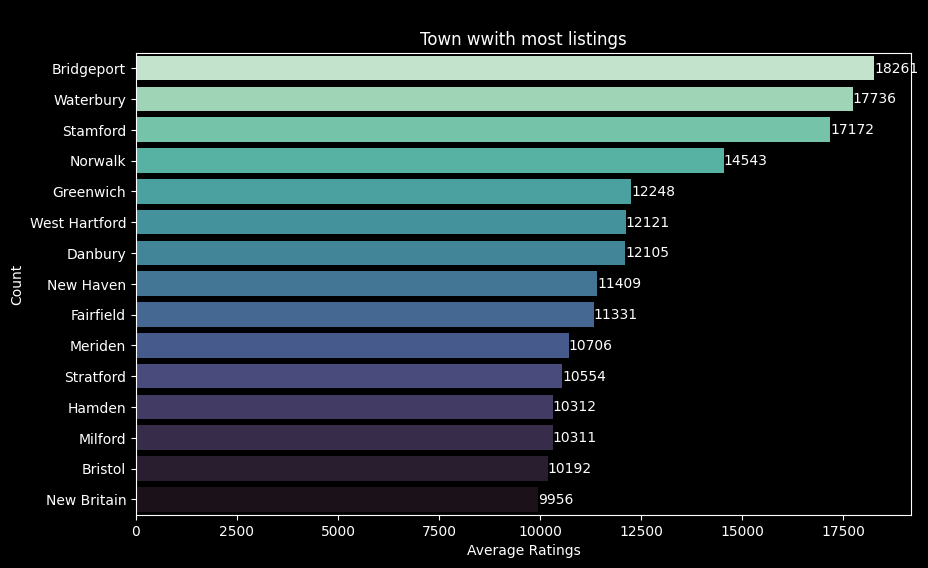

In [15]:
plt.figure(figsize=(10,6))
ax = sns.barplot( x = 'Count', y ='Town', data = most_listed_towns.head(15), palette='mako_r')
plt.title('\nTown wwith most listings')
plt.ylabel('Count')
plt.xlabel('Average Ratings')
for bars in ax.containers:
    ax.bar_label(bars)

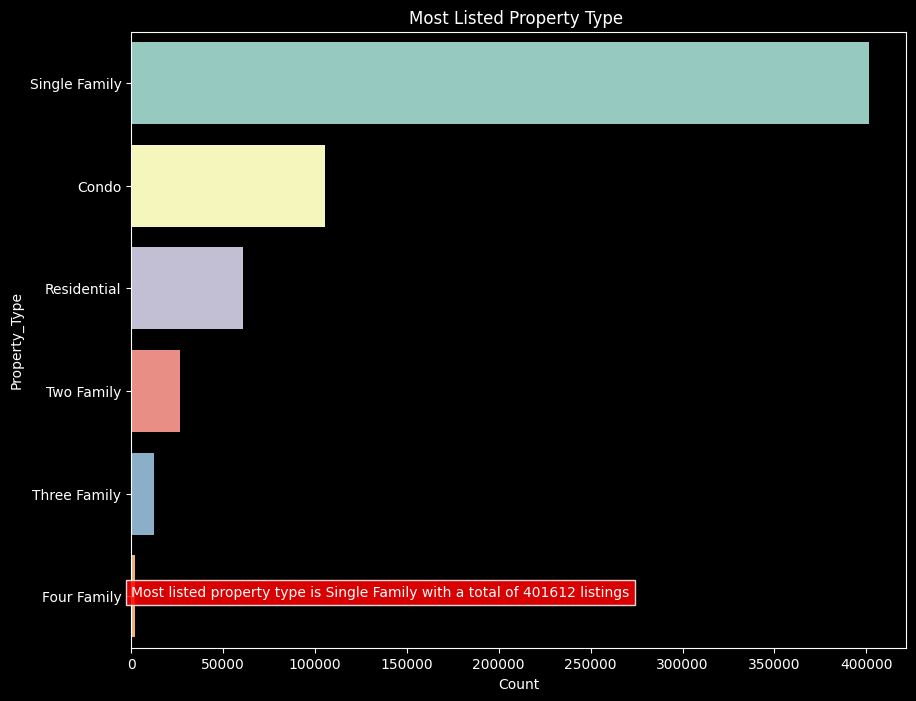

In [16]:
# Frequency of Property Type
property_type = real_estate.groupby('Property Type')['Serial Number'].count().reset_index().sort_values('Serial Number', ascending = False)
property_type.rename(columns ={'Serial Number':'Count', 'Property Type':'Property_Type'}, inplace = True)
plt.figure(figsize=(10, 8))
p=sns.barplot(data=property_type, x='Count',y='Property_Type')
p.text(60,5,f'Most listed property type is {property_type.Property_Type.iloc[0]} with a total of {property_type.Count.iloc[0]} listings', bbox=dict(facecolor='red', alpha=0.85))
p.set(title="Most Listed Property Type ") 
plt.show()

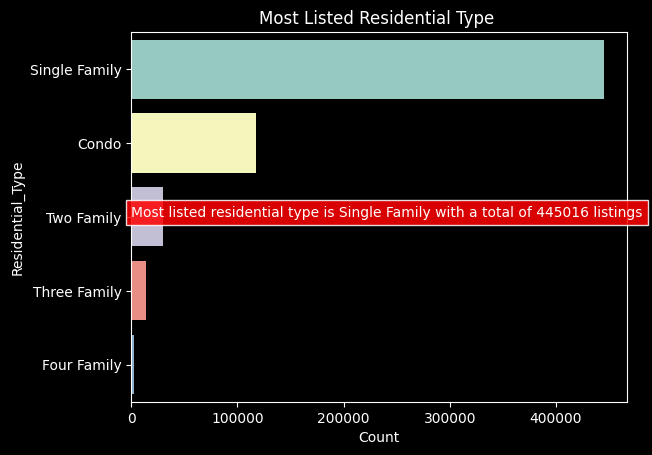

In [17]:
# Frequency of Resdential Type
Residential_type = real_estate.groupby('Residential Type')['Serial Number'].count().reset_index().sort_values('Serial Number',ascending =False)
Residential_type.rename(columns = {'Residential Type':'Residential_Type', 'Serial Number':'Count'}, inplace = True)
Residential_type
p=sns.barplot(data=Residential_type, x='Count',y='Residential_Type')
p.text(45,2,f'Most listed residential type is {Residential_type.Residential_Type.iloc[0]} with a total of {Residential_type.Count.iloc[0]} listings', bbox=dict(facecolor='red', alpha=0.85))
p.set(title="Most Listed Residential Type ") 
plt.show()

In [18]:
# Most Expensive Property 
sales_amount_max = real_estate['Sale Amount'].max()
real_estate[['Address', 'Property Type','Town','Sale Amount']][real_estate['Sale Amount'] == sales_amount_max]

,Address,Property Type,Town,Sale Amount
60894,224 RIVER ROAD,Residential,Willington,318790019.0


In [19]:
sales_amount_min = real_estate['Sale Amount'].min()
real_estate[['Address', 'Property Type', 'Town','Sale Amount']][real_estate['Sale Amount'] == sales_amount_min]

,Address,Property Type,Town,Sale Amount
386805,5 ROUGHLAND ROAD,Single Family,Norfolk,0.0
394929,"72, 78 & 80 JEFFERSON AVENUE",Single Family,New London,0.0
397078,603 UNION AVE,Two Family,Bridgeport,0.0
402505,28 PARKWAY SOUTH,Single Family,New London,0.0
402978,327 MONTAUK AVENUE,Single Family,New London,0.0
...,...,...,...,...
900812,63 ONEILL RD,Single Family,Oxford,0.0
902489,63 STONY MILL LANE,Condo,Berlin,0.0
914892,53 CENTER ST,Two Family,Winchester,0.0
921479,131 BELVIDERE,Single Family,Winchester,0.0


In [21]:
avg_sales_amount = real_estate['Sale Amount'].mean()
real_estate[['Address', 'Property Type', 'Sale Amount']][real_estate['Sale Amount'] >= avg_sales_amount]

,Address,Property Type,Sale Amount
1,390 TURNPIKE RD,Residential,430000.0
3,111 NORTHINGTON DRIVE,Residential,890000.0
4,70 FAR HILLS DRIVE,Residential,1447500.0
5,57 FAR HILLS DRIVE,Residential,1250000.0
7,216 WATCH HILL RD,Residential,677500.0
...,...,...,...
997197,22 BARHOLM AVENUE,Single Family,474000.0
997198,191 HUNTER DRIVE,Single Family,380000.0
997202,12 OLD FARM RD,Single Family,490000.0
997205,22 ROCKLEDGE DR,Single Family,456000.0


In [ ]:
real_estate.shape

(608904, 10)

Real Estate Dataset
                Problem Statement:
                    What year did the real estate market experience a boom
                    Trend of Sales over the years
                    What type of family type put their houses up for sale

        Data Preprocessing
        * Apart from the 'Date Recorded' column, there was no need to for convertion of data types to the apporiate ones
        * The percentage of null values was checked:
            For columns whose percentage of missing values was more than 50%, the columns were dropped from the dataframe completely
            For columns whose percentage of missing values was less then 50%, dropna() was enough to remove missing values 

        Exploratory Data Analysis:
            *It was observed that the average listings per year peaked in 2007, between 2010-2019 there was a steady rise and fall of the average listings. In 2020, the average number of listings repeaked again
            *The towns with most listings were Bridgeport, Waterbury and Stanford
            *The most listed property time is Single Family property type with a count of 401612 listings
            *The most listed family time is also the Single Family with a count of 445016 listings
            *Most expensive listing in this dataset is situated at 224 River Road, Willington with a sale price of $318,790,019.0 and its property type is resdential
            *It was also obsereved that there are 112 listings with a sale price of $0.0